In [5]:
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from collections import defaultdict

In [6]:
df = pd.read_csv('data/valuesMatrix.csv')
df.columns
df.head(10)

,name,lvl
0,none,1
1,little,2
2,some,3
3,more,4
4,all,5
5,ACCEPTANCE,2
6,ACHIEVEMENT,3
7,ADVENTURE,4
8,ART,4
9,ATTRACTIVENESS,4


In [7]:
nameDict = df['name']
nameDict[0]
df = df.drop('name',axis=1)
# # range of lvls 1-5
df[df['lvl'] < 5] -= 1
#df.rename(columns={'lvl': 'node'}, inplace=True)
newCol = df['lvl'].to_numpy()
newCol = [[idx,x] for idx, x in enumerate(newCol)]
df['edges'] = newCol
df['name'] = nameDict
df.head(10)

,lvl,edges,name
0,0,"[0, 0]",none
1,1,"[1, 1]",little
2,2,"[2, 2]",some
3,3,"[3, 3]",more
4,5,"[4, 5]",all
5,1,"[5, 1]",ACCEPTANCE
6,2,"[6, 2]",ACHIEVEMENT
7,3,"[7, 3]",ADVENTURE
8,3,"[8, 3]",ART
9,3,"[9, 3]",ATTRACTIVENESS


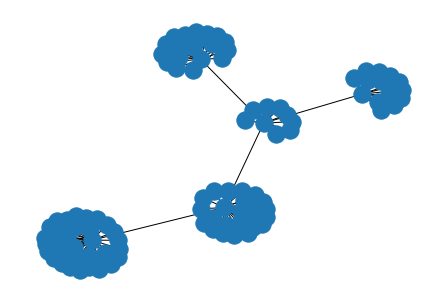

In [8]:
def bipartite(u,v,edges):
    bi = nx.Graph()
    bi.add_nodes_from(u, bipartite=0)
    bi.add_nodes_from(v, bipartite=1)
    bi.add_edges_from(edges)
    return bi


edges = df['edges'].to_list()

for idx, value in enumerate(edges):
    if idx < 5:
        edges[idx][0] += 1
    else:
        break
edges
# # scale
u = [x for x in range(4)]
v = [x for x in range(4,len(edges)-1)]
# edges = [(edge,scale) for edge,scale in enumerate(g2_adjDictValue)]

biGraph = bipartite(u,v,edges)
nx.draw(biGraph)